In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics

In [1]:
import os
asset_dir = 'D:/SEM 8/TA/DRAFT TA/DATANEW'
merah = os.path.join(asset_dir, 'MERAH')
biru = os.path.join(asset_dir, 'BIRU')
kuning = os.path.join(asset_dir, 'KUNING')
hijau = os.path.join(asset_dir, 'HIJAU')
ungu = os.path.join(asset_dir, 'UNGU')
oranye = os.path.join(asset_dir, 'ORANYE')

os.listdir(asset_dir)

['BIRU', 'HIJAU', 'KUNING', 'MERAH', 'ORANYE', 'UNGU']

In [2]:
import pandas as pd

df = pd.DataFrame(data = [len(os.listdir(merah)), len(os.listdir(biru)), len(os.listdir(kuning)), len(os.listdir(hijau)), len(os.listdir(ungu)), len(os.listdir(oranye))],
                  index = ['Merah', 'Biru', 'Kuning', 'Hijau', 'Ungu', 'Oranye'], columns = ['Dataset'])

print(df)

total_images = df['Dataset'].sum()
print(f"\nJumlah Data: {total_images}")

        Dataset
Merah       100
Biru        100
Kuning      100
Hijau       100
Ungu        100
Oranye      100

Jumlah Data: 600


In [23]:
import os
import shutil
import numpy as np

# Direktori dataset
src_directory = 'D:/SEM 8/TA/DRAFT TA/DATANEW'

# Direktori tujuan data train, validation, dan test
train_dir = 'D:/SEM 8/TA/DRAFT TA/DATA_LATIH_UJI/train'
test_dir = 'D:/SEM 8/TA/DRAFT TA/DATA_LATIH_UJI/test'

# Rasio pembagian
train_ratio = 0.8
test_ratio = 0.2

for class_name in os.listdir(src_directory):
    # Buat direktori kelas di dalam setiap set data
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    #os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Daftar semua file dalam direktori kelas
    src_class_dir = os.path.join(src_directory, class_name)
    files = os.listdir(src_class_dir)

    # Acak dan bagilah file ke setiap set data
    np.random.shuffle(files)
    train_split = int(len(files) * train_ratio)
    #val_split = int(len(files) * (train_ratio + val_ratio))

    train_files = files[:train_split]
    #val_files = files[train_split:val_split]
    test_files = files[train_split:]

    # Salin file ke direktori tujuan yang sesuai
    for fname in train_files:
        shutil.copy(os.path.join(src_class_dir, fname), os.path.join(train_dir, class_name))
    #for fname in val_files:
     #   shutil.copy(os.path.join(src_class_dir, fname), os.path.join(val_dir, class_name))
    for fname in test_files:
       shutil.copy(os.path.join(src_class_dir, fname), os.path.join(test_dir, class_name))


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Insialisasi ImageDataGenerator untuk set pelatihan
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.25,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

# Menyesuaikan path direktori ke direktori pelatihan dan validasi
train_dir = 'D:/SEM 8/TA/DRAFT TA/DATA_LATIH_UJI/train'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'rgb',
    classes = ['MERAH', 'BIRU', 'KUNING', 'HIJAU', 'UNGU', 'ORANYE']
)

Found 480 images belonging to 6 classes.


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mempersiapkan test generator
test_dir = 'D:/SEM 8/TA/DRAFT TA/DATA_LATIH_UJI/test'
test_generator = ImageDataGenerator(rescale=1/255.0)

test_data_generator = test_generator.flow_from_directory(
    test_dir,  # Asumsikan 'test_dir' adalah direktori yang berisi data test
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    classes=['MERAH', 'BIRU', 'KUNING', 'HIJAU', 'UNGU', 'ORANYE'],
    shuffle = False
)

Found 120 images belonging to 6 classes.


In [29]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Feature extraction
    # Layer konvolusi 1, input_shape = 224x224, dengan 3 kanal (rgb)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D (2,2),

    # Layer konvolusi 2
    tf.keras.layers.Conv2D (64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D (2,2),

    # Layer konvolusi 3
    tf.keras.layers.Conv2D (128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D (2, 2),

    # Layer konvolusi 4
    tf.keras.layers.Conv2D (256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D (2, 2),

    # Fully Connected Layer
    # Flatten layer (meratakan output dense layer)
    tf.keras.layers.Flatten(),

    # Dense layer
    tf.keras.layers.Dense (128, activation='relu'),
    tf.keras.layers.Dropout (0.5),

    # Lapisan output dengan 6 kelas klasifikasi (menggunakan softmax)
    tf.keras.layers.Dense(6, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [31]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [32]:
historyModel = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 100,
)

Epoch 1/100
15/15 [==============================] - 47s 3s/step - loss: 1.1424 - accuracy: 0.5292
Epoch 2/100
15/15 [==============================] - 45s 3s/step - loss: 0.4038 - accuracy: 0.8771
Epoch 3/100
15/15 [==============================] - 45s 3s/step - loss: 0.2181 - accuracy: 0.9187
Epoch 4/100
15/15 [==============================] - 45s 3s/step - loss: 0.2847 - accuracy: 0.9167
Epoch 5/100
15/15 [==============================] - 46s 3s/step - loss: 0.2053 - accuracy: 0.9375
Epoch 6/100
15/15 [==============================] - 46s 3s/step - loss: 0.1629 - accuracy: 0.9500
Epoch 7/100
15/15 [==============================] - 45s 3s/step - loss: 0.2968 - accuracy: 0.9167
Epoch 8/100
15/15 [==============================] - 49s 3s/step - loss: 0.1708 - accuracy: 0.9479
Epoch 9/100
15/15 [==============================] - 43s 3s/step - loss: 0.1896 - accuracy: 0.9583
Epoch 10/100
15/15 [==============================] - 44s 3s/step - loss: 0.2621 - accuracy: 0.9375
Epoch 11/

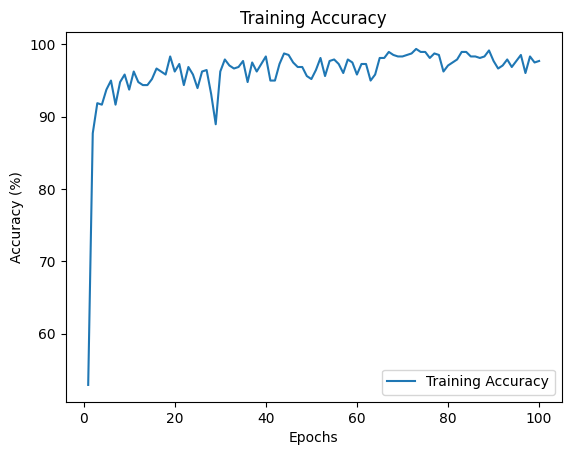

Last Training Accuracy: 97.70833253860474 %
Last Training Loss: 0.1043434888124466


In [33]:
import matplotlib.pyplot as plt

# Ambil nilai akurasi, loss, val_loss, dan val_acc dari historyModel
train_accuracy = historyModel.history['accuracy']
#val_accuracy = historyModel.history['val_accuracy']
train_loss = historyModel.history['loss']
#val_loss = historyModel.history['val_loss']

# Ubah nilai akurasi dan val_acc menjadi persen
train_accuracy_percent = [acc * 100 for acc in train_accuracy]
#val_accuracy_percent = [acc * 100 for acc in val_accuracy]

# Plotting grafik
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy_percent, label='Training Accuracy')
#plt.plot(epochs, val_accuracy_percent, label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

print("Last Training Accuracy:", train_accuracy_percent[-1], "%")
#print("Last Validation Accuracy:", val_accuracy_percent[-1], "%")
print("Last Training Loss:", train_loss[-1])
#print("Last Validation Loss:", val_loss[-1])

In [34]:
model.save("D:/SEM 8/TA/DRAFT TA/file_model/100epoch64bs.h5")

4/4 [==============================] - 5s 947ms/step


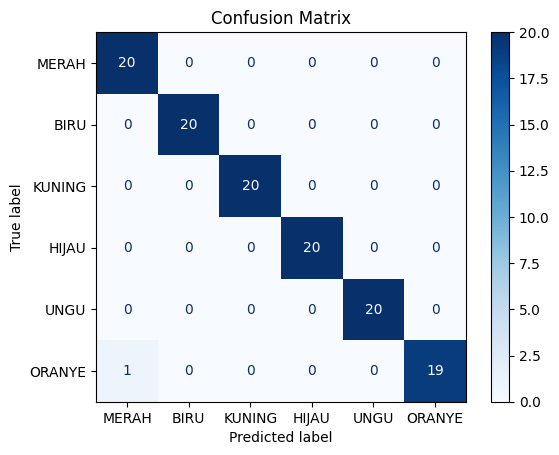

              precision    recall  f1-score   support

       MERAH       0.95      1.00      0.98        20
        BIRU       1.00      1.00      1.00        20
      KUNING       1.00      1.00      1.00        20
       HIJAU       1.00      1.00      1.00        20
        UNGU       1.00      1.00      1.00        20
      ORANYE       1.00      0.95      0.97        20

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Memuat model
model = tf.keras.models.load_model('D:/SEM 8/TA/DRAFT TA/file_model/100epoch64bs.h5')

# Memprediksi kelas menggunakan generator test
y_pred_prob = model.predict(test_data_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_data_generator.classes

# Mendapatkan class labels
class_labels = list(test_data_generator.class_indices.keys())

# Mendapatkan confusion matrix
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=class_labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print(classification_report(y_true, y_pred, target_names=class_labels))


In [15]:
import tensorflow as tf
# Memuat model
model = tf.keras.models.load_model('D:/SEM 8/TA/DRAFT TA/file_model/100epoch64bs.h5')

# Convert the model to TensorFlow Lite with optimization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply default optimizations which might include quantization
tflite_model = converter.convert()

# Save the model to disk
with open('D:/SEM 8/TA/DRAFT TA/model100_64.tflite', "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\HAPPYC~1\AppData\Local\Temp\tmp_ric1kic\assets


INFO:tensorflow:Assets written to: C:\Users\HAPPYC~1\AppData\Local\Temp\tmp_ric1kic\assets
